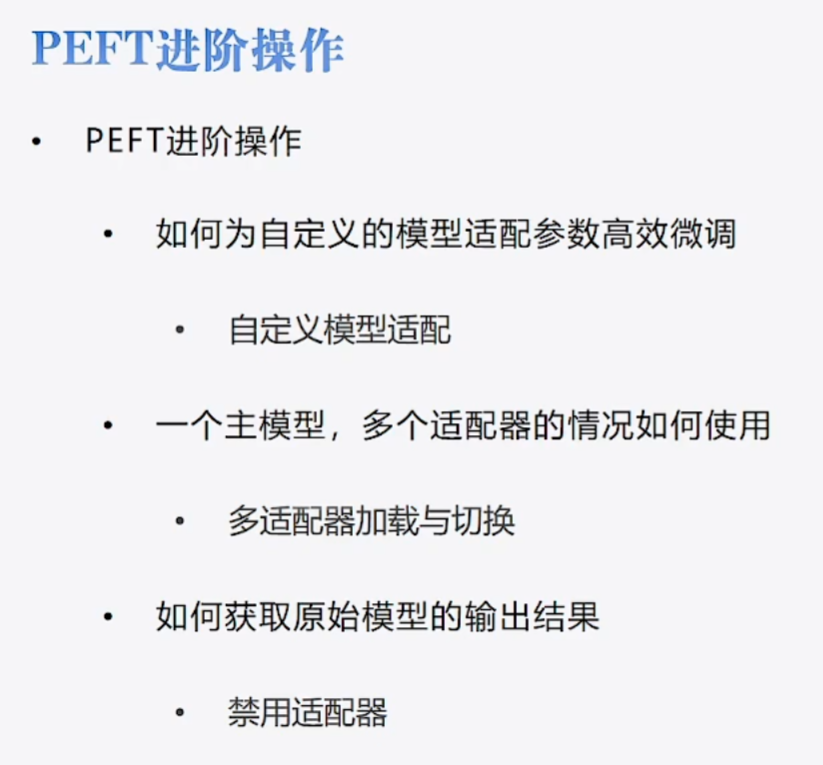

In [6]:
import torch
from torch import nn
from peft import LoraConfig, get_peft_model, PeftModel

## 1、自定义模型适配

In [7]:
net1 = nn.Sequential(
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 2)
)
net1

Sequential(
  (0): Linear(in_features=10, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)

In [8]:
for name,param in net1.named_parameters():
    print(name)

0.weight
0.bias
2.weight
2.bias


In [17]:
# 根据上面的net1输出值来查看这里面target_modules的输入值
config = LoraConfig(target_modules=["0"])


In [18]:
model1 = get_peft_model(net1, config)

In [14]:
model1

PeftModel(
  (base_model): LoraModel(
    (model): Sequential(
      (0): lora.Linear(
        (base_layer): Linear(in_features=10, out_features=10, bias=True)
        (lora_dropout): ModuleDict(
          (default): Identity()
        )
        (lora_A): ModuleDict(
          (default): Linear(in_features=10, out_features=8, bias=False)
        )
        (lora_B): ModuleDict(
          (default): Linear(in_features=8, out_features=10, bias=False)
        )
        (lora_embedding_A): ParameterDict()
        (lora_embedding_B): ParameterDict()
        (lora_magnitude_vector): ModuleDict()
      )
      (1): ReLU()
      (2): Linear(in_features=10, out_features=2, bias=True)
    )
  )
)

## 2、多适配器加载与切换

In [20]:
net2 = nn.Sequential(
    nn.Linear(10, 10),
    nn.ReLU(),
    nn.Linear(10, 2)
)
net2

Sequential(
  (0): Linear(in_features=10, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=2, bias=True)
)

In [24]:
config1 = LoraConfig(target_modules=["0"])
model2 = get_peft_model(net2, config1)
model2.save_pretrained("./loraA")



In [23]:


config2 = LoraConfig(target_modules=["2"])
model2 = get_peft_model(net2, config2)
model2.save_pretrained("./loraB")

In [25]:
model2 = PeftModel.from_pretrained(net2, model_id="./loraA/", adapter_name="loraA")
model2

PeftModel(
  (base_model): LoraModel(
    (model): Sequential(
      (0): lora.Linear(
        (base_layer): Linear(in_features=10, out_features=10, bias=True)
        (lora_dropout): ModuleDict(
          (default): Identity()
          (loraA): Identity()
        )
        (lora_A): ModuleDict(
          (default): Linear(in_features=10, out_features=8, bias=False)
          (loraA): Linear(in_features=10, out_features=8, bias=False)
        )
        (lora_B): ModuleDict(
          (default): Linear(in_features=8, out_features=10, bias=False)
          (loraA): Linear(in_features=8, out_features=10, bias=False)
        )
        (lora_embedding_A): ParameterDict()
        (lora_embedding_B): ParameterDict()
        (lora_magnitude_vector): ModuleDict()
      )
      (1): ReLU()
      (2): lora.Linear(
        (base_layer): Linear(in_features=10, out_features=2, bias=True)
        (lora_dropout): ModuleDict(
          (default): Identity()
        )
        (lora_A): ModuleDict(
    

In [26]:
model2.load_adapter(model_id="./loraB/", adapter_name="loraB")

_IncompatibleKeys(missing_keys=['base_model.model.0.base_layer.weight', 'base_model.model.0.base_layer.bias', 'base_model.model.0.lora_A.default.weight', 'base_model.model.0.lora_A.loraA.weight', 'base_model.model.0.lora_B.default.weight', 'base_model.model.0.lora_B.loraA.weight', 'base_model.model.2.base_layer.weight', 'base_model.model.2.base_layer.bias', 'base_model.model.2.lora_A.default.weight', 'base_model.model.2.lora_B.default.weight'], unexpected_keys=['base_model.model.0.lora_A.loraB.weight', 'base_model.model.0.lora_B.loraB.weight'])

In [27]:
model2.active_adapter

'loraA'